# Maix-III AXera-Pi 试试 Python 编程

|     时间      | 负责人 |   更新内容   |
| :-----------: | :----: | :----------: |
| 2022.12.02 | lyx | 初次编写文档 |
| 2022.12.15 | lyx | 增加内容 |
| 2023.01.04 | lyx | 增加人脸/车牌识别、Yolov6等新模型 |
| 2023.01.29 | lyx | 补充细节说明 |

## 什么是 Python 

**Python**
是一种广泛使用的解释型、高级和通用的编程语言。它支持多种编程范型包括函数式、指令式、反射式、结构化和面向对象编程，还拥有动态类型系统和垃圾回收功能，能够自动管理内存使用，并且其本身拥有一个巨大而广泛的标准库。

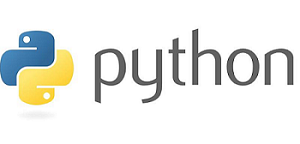

-   **Python 与 C++ 相比有什么区别？**
    
   从上文得知 Python 是一种解释型语言，用户不需要编译以扩展名为 `.py` 的代码可传递给解释器生成输出。而 C++ 是编译型语言，编译器需要把源代码生成目标代码再执行生成输出。对于初学者来说 Python 更易于学习并且语法简单、可读性更强。而 C++ 在系统编程及性能上更优胜，但语法复杂编写起来对初学者有一定的挑战难度。

- **Python 基础及入门学习**
  
  在使用 Jupyter Notebook 进行 Python 编程之前，同学们需要掌握一定的 Python 语言的基础才能接着往下走，可根据下列提供的传送门进行学习。

  [什么是 Python ?](https://wiki.sipeed.com/soft/maixpy3/zh/origin/python.html?highlight=python)

  [国内 Python 基础教程](https://wiki.sipeed.com/soft/maixpy3/zh/origin/video.html)

  **以下的文章适合有一定 Python 基础想深入的同学们：**

  [大佬鼠の嵌入式 Python 入门教程[1]](https://wiki.sipeed.com/soft/maixpy3/zh/origin/hello_world.html)

  [大佬鼠の嵌入式 Python 入门教程[2]](https://wiki.sipeed.com/soft/maixpy3/zh/origin/loop_python.html)

## 什么是 Jupyter Notebook 

它是同时兼具 Python3、Markdown 及 Terminal 的环境并基于网页的用于交互计算的应用程序。其可应用于开发、文档编写、运行代码和展示结果，以网页的形式打开并可直接编写及运行代码，运行结果也会直接显示在代码框下层。如在过程中需要编写说明文档，可在同页面中编写便于及时的解释和说明。

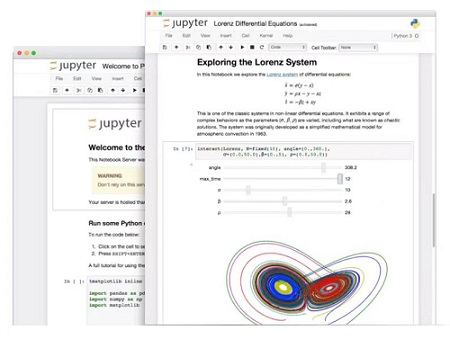

## 启动 Jupyter Notebook 

> 如果你已经跟随章节学习到达了这里，相信你已经在前面章节中掌握了如何在 AXera-Pi 进行烧录登录系统、验证外设等基础的 Linux 操作了，并基于上文对 Python 语言有一定的了解和基础，那就接着往下学习怎么进行 Python 编程吧！ 
> - [产品上手指南](https://wiki.sipeed.com/hardware/zh/maixIII/ax-pi/flash_system.html)
> - [系统使用手册](https://wiki.sipeed.com/hardware/zh/maixIII/ax-pi/basic_usage.html)

使用前准备一台 **AXera-Pi** 设备接入电脑端通电，参考[系统登录](/hardware/zh/maixIII/ax-pi/basic_usage.html#系统登录)连接到 Linux 系统上，登录后使用 `ifconfig` 在终端查询设备 IP 地址，再输入 `jupyter notebook` 命令启动它，终端会返回一系列服务器的信息。

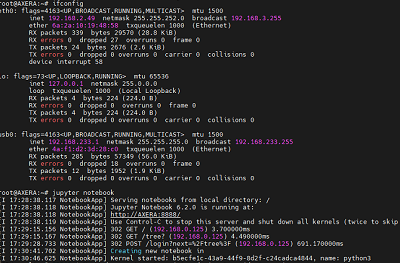

> **注意**：使用 Jupyter Notebook 时终端需保持连接状态，否则会与本地服务器的连接断开而无法操作。

打开任意浏览器输入刚查询到的 IP 地址并在后缀加上 `:8888` 即可直接访问网页**（注意：lo:127.0.0.1 此 IP 地址不可用）,**网页会提醒需要输入密码 **`root`** 后访问。

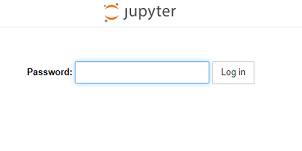 
   
输入后会跳转到 `Files` 的页面，点击右侧的 `New` 可选择符合需求的编辑环境。

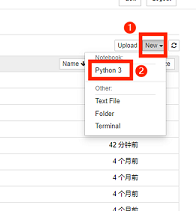

``` bash
Python3：默认的python3 kernel
Text File：新建一个文本文件
Folder：新建一个文件夹
Terminal：在浏览器中新建一个用户终端，类似于 shell/adb 终端.
```

## 基础用法

这里介绍每个方框称为单元格，单元框左侧会有 **蓝色（命令模式）** 或 **绿色（编辑模式）** 两种颜色。

通用用法：

- **Shift+ Enter：**运行单元格，且以命令模式切换到下一个单元格
- **Ctrl + Enter：**运行单元格，且进入命令模式

编辑模式中：

- **Esc**：进入命令模式

命令模式中：

- **h：**打开帮助
- **Enter：**进入编辑模式
- **x：**剪切单元格
- **c：**复制单元格
- **v：**粘贴单元格
- **dd：**删除整个单元格
- **ii：**终止运行
- **A：**向光标所在单元格上方添加单元格
- **B：**向下添加
- **M：**使得单元格变成 markdown 状态

## 运行代码

>本篇文章所有的示例代码都是摄像头 GC4653 为例，如有 OS04A10 型号请前往 [Maix-III 系列 AXera-Pi 常见问题（FAQ）](https://wiki.sipeed.com/hardware/zh/maixIII/ax-pi/faq_axpi.html)修改。

用户选择 `Python3` 环境即可进入编辑页面，在网页上运行 Python 代码有以下三种方式为例供大家参考，代码运行后编辑框下会打印输出结果，用户可以从板卡设备屏幕观察到运行效果。

- **使用 `! + cmd` 运行内置的脚本或命令行，或是直接在框内编辑 `Python` 代码并点击运行，这里以运行 `NPU` 应用为例。**  

In [5]:
!ls home/images

air.jpg        carvana02.jpg	 face5.jpg	   o2_resize.jpg  ssd_car.jpg
aoa-2.jpeg     carvana03.jpg	 grace_hopper.jpg  pineapple.jpg  ssd_dog.jpg
aoa.jpeg       carvana04.jpg	 mobileface01.jpg  pose-1.jpeg	  ssd_horse.jpg
bike.jpg       cat.jpg		 mobileface02.jpg  pose-2.jpeg
bike2.jpg      cityscape.png	 mtcnn_face4.jpg   pose-3.jpeg
cable.jpg      dog.jpg		 mtcnn_face6.jpg   pose.jpg
carvana01.jpg  efficientdet.png  mv2seg.png	   selfie.jpg


In [13]:
!/home/ax-samples/build/install/bin/ax_yolov5s -m /home/models/yolov5s.joint -i /home/images/cat.jpg -r 10

--------------------------------------
model file : /home/models/yolov5s.joint
image file : /home/images/cat.jpg
img_h, img_w : 640 640
[AX_SYS_LOG] AX_SYS_Log2ConsoleThread_Start
Run-Joint Runtime version: 0.5.10
--------------------------------------
[INFO]: Virtual npu mode is 1_1

Tools version: d696ee2f
run over: output len 3
--------------------------------------
Create handle took 487.99 ms (neu 22.29 ms, axe 0.00 ms, overhead 465.70 ms)
--------------------------------------
Repeat 10 times, avg time 22.57 ms, max_time 22.88 ms, min_time 22.46 ms
--------------------------------------
detection num: 1
15:  89%, [ 167,   28,  356,  353], cat
[AX_SYS_LOG] Waiting thread(2867848448) to exit
[AX_SYS_LOG] AX_Log2ConsoleRoutine terminated!!!
exit[AX_SYS_LOG] join thread(2867848448) ret:0


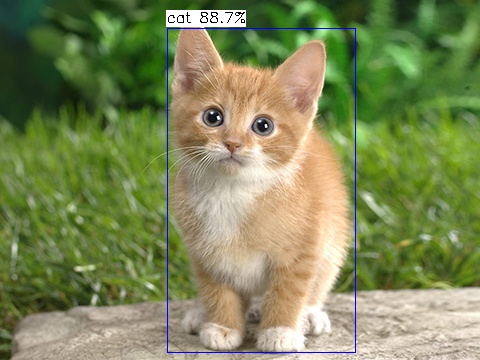

In [15]:
from IPython.display import Image
Image("yolov5s_out.jpg")

- **也可以使用 `%run` 跑模块文件或 `.py`文件，这里以运行 `hello.py` 为例。**

In [18]:
%run hello.py

hello world！


## 启动终端

> 上文演示了如何实现 Python 编程，而 **Jupyter Notebook** 还能开启终端并与 `Python3` 同时运行。

回到 `home page` 后点击右侧的 `New` 后选择 `Terminal` 新建终端进行操作。
用户可以在 `Files` 页面直接查看内置目录的文件夹，或者是使用终端用 `ls` 查看目录，用 `cd` 进入目录。

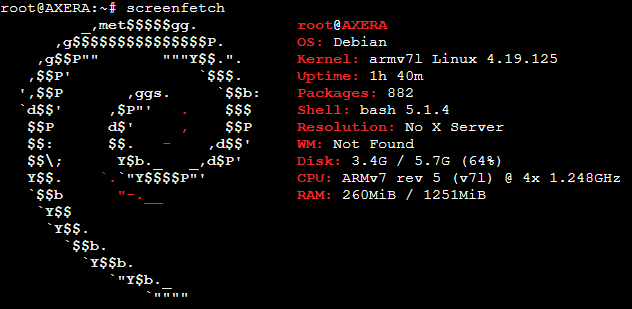

## 编写文档

> 用户可在 **Jupyter Notebook** 里使用 `Markdowm` 语法编写文档提升代码的易读性以及条理性。

点击编辑框把模式从代码更换成 `Markdown` ，在命令模式下可使用 `M` 键变成 `Markdown` 状态。

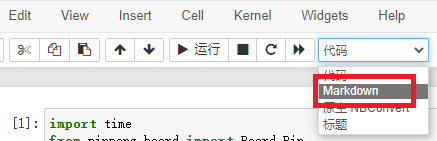

## 传输文件

>除了运行代码以及编写文档等还可以进行文件的传输，让用户使用更加便捷。

- **如何导入电脑端的文件，以下面两种方式为例：**

点击主页右侧 `New` 新建 `Text File：文本文件`或 `Folder：文件夹或文件`，手动复制粘贴内容导入文件。

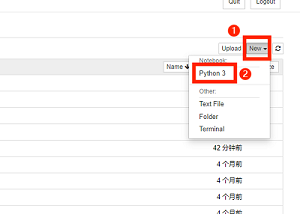

或者是直接从网页端导入文件，点击右侧的 `Upload` 直接在任意目录下导入需要的文件即可。
  
   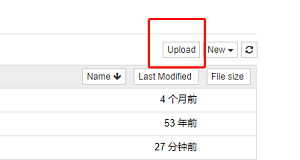

- **如何导出我们在网页端编写的文件，以下面为例：**

在网页端编写的的内容都可以以文档的形似输出，默认保存的是以后缀名为 `.ipynb` 的 `json` 格式，保存不同格式请点击 `File`-\>`Download as`-\>`选择你需要的格式即可`，网页会自动下载到本地。

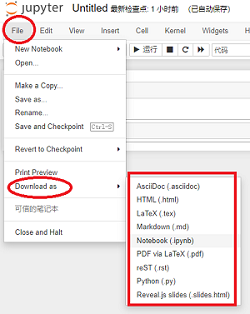

## ax-pipeline-api

[**ax-pipeline-api：**](https://github.com/junhuanchen/ax-pipeline-api)此项目是基于 [ax-pipeline](https://github.com/AXERA-TECH/ax-pipeline) 适配了实现 Python API 编程，用户可使用 Python 编程调用内置的多种 AI 模型以及通用的 Python 库 pinpong、opencv、numpy、pillow 等，让 AXera-Pi 用起来更加轻松简单！

在使用 `ax-pipeline-api` 之前先做好以下准备工作：

- 如何安装获取 `ax-pipeline-api` 包

因 `ax-pipeline-api` 更新升级较频繁，用户在使用 Python 编程前可先在终端使用下方命令行更新包，确保自己使用是最新版本的即可。

```bash
pip3 install ax-pipeline-api -U
```
>如果出现更新失败，可替换清华源 `-i https://pypi.tuna.tsinghua.edu.cn/simple`加速一下.

把 `ax-pipeline-api` 包升级好后，接下来我们先跑个 `yolo5vs` 模型实现目标检测！

## 调用 yolov5s 实现目标检测 

In [10]:
import time
from ax import pipeline

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/yolov5s.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        for i in tmp['mObjects']:
            x, y, w, h = i['bbox']['x'], i['bbox']['y'], i['bbox']['w'], i['bbox']['h']
            objname, objprob = i['objname'], i['prob']
            print(objname, objprob, x, y, w, h)
        # if tmp['nObjSize'] > 10: # try exit
        #     pipeline.free()
pipeline.free()


b'toilet' 0.4541160762310028 0.602770209312439 0.9111631512641907 0.16810722649097443 0.08513855934143066
b'toilet' 0.6902503967285156 0.606963574886322 0.9117961525917053 0.16024480760097504 0.08727789670228958
b'toilet' 0.6852353811264038 0.6020327210426331 0.9118891358375549 0.16942621767520905 0.08718493580818176
b'toilet' 0.7014157176017761 0.6041151881217957 0.9120386242866516 0.16582755744457245 0.0863698348402977
b'cup' 0.46080872416496277 0.6049922108650208 0.9143685698509216 0.1643451750278473 0.08425315469503403


从上面跑的 yolov5s 模型示例来看，运行时编辑框下会打印输出目标检测的相关结果参数，而实际画面可在板卡屏幕上查看。我们也可以从上面的代码中替换掉不同功能的 `.so` 库或者是更换不同效果的 `AI` 模型来实现更多的 AI 应用。

>更换 `.so` 库以及更换 `AI` 模型请参考以下示例进行修改，这篇文档只挑选部分经典模型作为示例，大家可以举一反三进行更换功能库以及模型。所有示例都使用 `GC4653` 摄像头如有 OS04A10 型号请前往 [Maix-III 系列 AXera-Pi 常见问题（FAQ）](https://wiki.sipeed.com/hardware/zh/maixIII/ax-pi/faq_axpi.html)修改。

- 以下是内置的 libxxx*.so 库总览：

**可通过替换不同的 `libxxx*.so` 来选择更换不同的功能。**

```bash
libsample_h264_ivps_joint_vo_sipy.so            # input h264 video to ivps joint output screen vo
libsample_v4l2_user_ivps_joint_vo_sipy.so       # input v4l2 /dev/videoX to ivps joint output screen vo
libsample_rtsp_ivps_joint_rtsp_vo_sipy.so       # input video from rtsp to ivps joint output rtsp and screen vo
libsample_vin_ivps_joint_vo_sipy.so             # input mipi sensor to ivps joint output screen vo
libsample_vin_ivps_joint_venc_rtsp_sipy.so      # input mipi sensor to ivps joint output rtsp
libsample_vin_ivps_joint_venc_rtsp_vo_sipy.so   # input mipi sensor to ivps joint output rtsp and screen vo
libsample_vin_ivps_joint_vo_h265_sipy.so        # input mipi sensor to ivps joint output screen vo and save h265 video file
```

**更换 `libxxx*.so` 可参考以下示例：**

```bash
    pipeline.load([
        'libsample_vin_ivps_joint_venc_rtsp_vo_sipy.so',
        '-p', '/home/config/yolov5s.json',
        '-c', '2',
    ])
```

- 以下是内置的多种 AI 模型总览：

**AI 模型被内置在 `/home/config` 的目录下，可更换不用模型来实现不同的 AI 应用。**

```bash
ax_bvc_det.json              hrnet_pose_yolov8.json           yolov5s_face_recognition.json
ax_person_det.json           license_plate_recognition.json   yolov5s_license_plate.json
ax_pose.json		          nanodet.json		                yolov6.json
ax_pose_yolov5s.json	      palm_hand_detection.json	     yolov7.json
ax_pose_yolov8.json	      pp_human_seg.json		         yolov7_face.json
crowdcount.json		      scrfd.json			             yolov7_palm_hand.json
hand_pose.json		          yolo_fastbody.json		         yolov8.json
hand_pose_yolov7_palm.json   yolopv2.json		                 yolov8_seg.json
hrnet_animal_pose.json	      yolov5_seg.json		             yolox.json
hrnet_pose.json		      yolov5s.json
hrnet_pose_ax_det.json	      yolov5s_face.json
```

**更换 AI 模型可参考以下示例：**

``` bash
pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/yolov5s_face.json',
    '-c', '2',
])
```

## 调用 yolov5s_face 实现人脸检测

In [17]:
import time
from ax import pipeline

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/yolov5s_face.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        for i in tmp['mObjects']:
            print(i)
        # if tmp['nObjSize'] > 10: # try exit
        #     pipeline.free()
pipeline.free()

{'label': 0, 'prob': 0.44722938537597656, 'objname': b'face', 'bbox': {'x': 0.32209691405296326, 'y': 0.5537495017051697, 'w': 0.08040990680456161, 'h': 0.1871424913406372}, 'bHasBoxVertices': 0, 'nLandmark': 5, 'landmark': [{'x': 0.34694865345954895, 'y': 0.6272169351577759}, {'x': 0.3749236762523651, 'y': 0.6124960780143738}, {'x': 0.3601255416870117, 'y': 0.6418469548225403}, {'x': 0.35046160221099854, 'y': 0.6791355609893799}, {'x': 0.37618887424468994, 'y': 0.6769239902496338}]}


## 调用 yolov5s-seg 实现实例分割

In [2]:
import time
from ax import pipeline

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/yolov5_seg.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        for i in tmp['mObjects']:
            print(i)
        # if tmp['nObjSize'] > 10: # try exit
        #     pipeline.free()
pipeline.free()

{'label': 33, 'prob': 0.5606005191802979, 'objname': b'kite', 'bbox': {'x': 0.6935881972312927, 'y': 0.2124193012714386, 'w': 0.04874410480260849, 'h': 0.07958509773015976}, 'bHasBoxVertices': 0, 'bHasLandmark': 0, 'bHasMask': 1, 'mYolov5Mask': {'w': 9, 'h': 8, 'data': b'\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'}}
{'label': 33, 'prob': 0.6723322868347168, 'objname': b'kite', 'bbox': {'x': 0.6944284439086914, 'y': 0.21624213457107544, 'w': 0.05162983015179634, 'h': 0.08279800415039062}, 'bHasBoxVertices': 0, 'bHasLandmark': 0, 'bHasMask': 1, 'mYolov5Mask': {'w': 9, 'h': 8, 'data': b'\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\x00\x00\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\x00\x0

## 调用 PP_Humanseg 实现人体分割

In [ ]:
import time
from ax import pipeline

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/pp_human_seg.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        for i in tmp['mObjects']:
            print(i)
        # if tmp['nObjSize'] > 10: # try exit
        #     pipeline.free()
pipeline.free()


## 调用 ax-poes-ppl 实现人体姿态检测

In [26]:
import time
from ax import pipeline

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/ax_pose.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        for i in tmp['mObjects']:
            print(i)
        # if tmp['nObjSize'] > 10: # try exit
        #     pipeline.free()
pipeline.free()

{'label': 0, 'prob': 0.41659796237945557, 'objname': b'person', 'bbox': {'x': 0.01200273260474205, 'y': 0.0, 'w': 0.9315435290336609, 'h': 0.9421796798706055}, 'bHasBoxVertices': 0, 'bHasLandmark': 17, 'landmark': [{'x': 0.6708333492279053, 'y': 0.23333333432674408}, {'x': 0.6427083611488342, 'y': 0.16851851344108582}, {'x': 0.6520833373069763, 'y': 0.14629629254341125}, {'x': 0.7322916388511658, 'y': 0.5055555701255798}, {'x': 0.7614583373069763, 'y': 0.06481481343507767}, {'x': 0.7541666626930237, 'y': 0.09444444626569748}, {'x': 0.7541666626930237, 'y': 0.1518518477678299}, {'x': 0.7124999761581421, 'y': 0.15925925970077515}, {'x': 0.5041666626930237, 'y': 0.08703703433275223}, {'x': 0.6739583611488342, 'y': 0.07407407462596893}, {'x': 0.690625011920929, 'y': 0.6814814805984497}, {'x': 0.7833333611488342, 'y': 0.25}, {'x': 0.7614583373069763, 'y': 0.25}, {'x': 0.35104167461395264, 'y': 0.6074073910713196}, {'x': 0.3489583432674408, 'y': 0.5777778029441833}, {'x': 0.0572916679084301,

## 调用 HandPose 实现手势姿态检测

In [38]:
import time
from ax import pipeline

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/hand_pose.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        for i in tmp['mObjects']:
            print(i)
        # if tmp['nObjSize'] > 10: # try exit
        #     pipeline.free()
pipeline.free()

{'label': 0, 'prob': 0.948456346988678, 'objname': b'hand', 'bbox': {'x': 0.26589435338974, 'y': 0.26926565170288086, 'w': 0.46994149684906006, 'h': 0.4706382751464844}, 'bHasBoxVertices': 1, 'bbox_vertices': [{'x': 1.4048067331314087, 'y': -0.42393070459365845}, {'x': 1.2827746868133545, 'y': 1.74061918258667}, {'x': 0.06521528959274292, 'y': 1.5236728191375732}, {'x': 0.18724757432937622, 'y': -0.6408770084381104}], 'bHasLandmark': 21, 'landmark': [{'x': 0.3895833194255829, 'y': 0.6722221970558167}, {'x': 0.4635416567325592, 'y': 0.5925925970077515}, {'x': 0.5979166626930237, 'y': 0.4888888895511627}, {'x': 0.6979166865348816, 'y': 0.4148148000240326}, {'x': 0.7562500238418579, 'y': 0.442592591047287}, {'x': 0.7541666626930237, 'y': 0.5388888716697693}, {'x': 0.8166666626930237, 'y': 0.4314814805984497}, {'x': 0.7927083373069763, 'y': 0.3314814865589142}, {'x': 0.768750011920929, 'y': 0.25925925374031067}, {'x': 0.746874988079071, 'y': 0.5981481671333313}, {'x': 0.778124988079071, 'y

## 调用 animal-pose 实现动物姿态检测

In [48]:
from ax import pipeline
import time
import threading

def pipeline_data(threadName, delay):
    time.sleep(0.2) # wait for pipeline.work() is True
    for i in range(400):
        time.sleep(delay)
        tmp = pipeline.result()
        if tmp and tmp['nObjSize']:
            for i in tmp['mObjects']:
                print(i)
    pipeline.free() # 400 * 0.05s auto exit pipeline

thread = threading.Thread(target=pipeline_data, args=("Thread-1", 0.05, ))
thread.start()

pipeline.load([
    b'libsample_vin_ivps_joint_venc_rtsp_vo_sipy.so',
    b'-p', b'/home/config/hrnet_animal_pose.json',
    b'-c', b'2',
]) 

thread.join() # wait thread exit

{'label': 14, 'prob': 0.6244175434112549, 'objname': b'bird', 'bbox': {'x': 0.4825528562068939, 'y': 0.3995664715766907, 'w': 0.24243469536304474, 'h': 0.28279656171798706}, 'bHasBoxVertices': 0, 'bHasLandmark': 20, 'landmark': [{'x': 0.6266645789146423, 'y': 0.37942758202552795}, {'x': 0.6266645789146423, 'y': 0.37942758202552795}, {'x': 0.6039101481437683, 'y': 0.3660016655921936}, {'x': 0.7025129199028015, 'y': 0.32572388648986816}, {'x': 0.5015149116516113, 'y': 0.33243685960769653}, {'x': 0.5963252782821655, 'y': 0.37942758202552795}, {'x': 0.5470238924026489, 'y': 0.5539646148681641}, {'x': 0.4863452613353729, 'y': 0.42641833424568176}, {'x': 0.4863452613353729, 'y': 0.6076683402061462}, {'x': 0.6987205147743225, 'y': 0.6143813133239746}, {'x': 0.5735708475112915, 'y': 0.5606775879859924}, {'x': 0.5963252782821655, 'y': 0.5472516417503357}, {'x': 0.4863452613353729, 'y': 0.6882238984107971}, {'x': 0.5394390821456909, 'y': 0.33243685960769653}, {'x': 0.49013766646385193, 'y': 0.66

## 调用 yolov5s Pillow 实现图像检测处理

In [3]:

import time
from ax import pipeline
from PIL import Image, ImageDraw

# ready sipeed logo canvas
lcd_width, lcd_height = 854, 480

img = Image.new('RGBA', (lcd_width, lcd_height), (255,0,0,200))
ui = ImageDraw.ImageDraw(img)
ui.rectangle((20,20,lcd_width-20,lcd_height-20), fill=(0,0,0,0), outline=(0,0,255,100), width=20)

logo = Image.open("/home/res/logo.png")
img.paste(logo, box=(lcd_width-logo.size[0], lcd_height-logo.size[1]), mask=None)

def rgba2argb(rgba):
    r,g,b,a = rgba.split()
    return Image.merge("RGBA", (a,b,g,r))
canvas_argb = rgba2argb(img)

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/yolov5s.json',
    # '-p', '/home/config/yolov8.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    argb = canvas_argb.copy()
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        ui = ImageDraw.ImageDraw(argb)
        for i in tmp['mObjects']:
            x = i['bbox']['x'] * lcd_width
            y = i['bbox']['y'] * lcd_height
            w = i['bbox']['w'] * lcd_width
            h = i['bbox']['h'] * lcd_height
            objlabel = i['label']
            objprob = i['prob']
            ui.rectangle((x,y,x+w,y+h), fill=(100,0,0,255), outline=(255,0,0,255))
            ui.text((x,y), str(objlabel))
            ui.text((x,y+20), str(objprob))
    pipeline.config("ui_image", (lcd_width, lcd_height, "ARGB", argb.tobytes()))

pipeline.free()

print_data 2 False


## 调用 ax-poes-ppl Pillow 实现人体姿态检测

In [5]:

import time
from ax import pipeline
from PIL import Image, ImageDraw

# ready sipeed logo canvas
lcd_width, lcd_height = 854, 480

img = Image.new('RGBA', (lcd_width, lcd_height), (255,0,0,200))
ui = ImageDraw.ImageDraw(img)
ui.rectangle((20,20,lcd_width-20,lcd_height-20), fill=(0,0,0,0), outline=(0,0,255,100), width=20)

logo = Image.open("/home/res/logo.png")
img.paste(logo, box=(lcd_width-logo.size[0], lcd_height-logo.size[1]), mask=None)

def rgba2argb(rgba):
    r,g,b,a = rgba.split()
    return Image.merge("RGBA", (a,b,g,r))
canvas_argb = rgba2argb(img)

pipeline.load([
    'libsample_vin_ivps_joint_vo_sipy.so',
    '-p', '/home/config/ax_pose.json',
    # '-p', '/home/config/hand_pose.json',
    # '-p', '/home/config/yolov5s_face.json',
    '-c', '2',
])

while pipeline.work():
    time.sleep(0.001)
    argb = canvas_argb.copy()
    tmp = pipeline.result()
    if tmp and tmp['nObjSize']:
        ui = ImageDraw.ImageDraw(argb)
        for i in tmp['mObjects']:
            if i["bHasBoxVertices"]:
                points = [ (p['x'] * lcd_width, p['y'] * lcd_height) for p in i['bbox_vertices']]
                ui.polygon(points, fill=(100,0,0,255), outline=(255,0,0,255))
            else:
                x = i['bbox']['x'] * lcd_width
                y = i['bbox']['y'] * lcd_height
                w = i['bbox']['w'] * lcd_width
                h = i['bbox']['h'] * lcd_height
                ui.rectangle((x,y,x+w,y+h), fill=(100,0,0,255), outline=(255,0,0,255))
            for p in i["landmark"]:
                x, y = (int(p['x']*lcd_width), int(p['y']*lcd_height))
                ui.rectangle((x-4,y-4,x+4, y+4), outline=(255,0,0,255))
    pipeline.config("ui_image", (lcd_width, lcd_height, "ARGB", argb.tobytes()))

pipeline.free()

## 调用 Pillow 进行图像处理并显示

> **Pillow（PIL）**是 Python 常用的图像处理库，而 Pillow 是 PIL 支，提供了广泛的文件格式支持，强大的图像处理能力，主要包括图像储存、图像显示、格式转换以及基本的图像处理操作等。

**使用以下的例子来说明如何使用 Python Pillow:**

In [4]:
!ls home/images

air.jpg        carvana02.jpg	 face5.jpg	   o2_resize.jpg  ssd_car.jpg
aoa-2.jpeg     carvana03.jpg	 grace_hopper.jpg  pineapple.jpg  ssd_dog.jpg
aoa.jpeg       carvana04.jpg	 mobileface01.jpg  pose-1.jpeg	  ssd_horse.jpg
bike.jpg       cat.jpg		 mobileface02.jpg  pose-2.jpeg
bike2.jpg      cityscape.png	 mtcnn_face4.jpg   pose-3.jpeg
cable.jpg      dog.jpg		 mtcnn_face6.jpg   pose.jpg
carvana01.jpg  efficientdet.png  mv2seg.png	   selfie.jpg


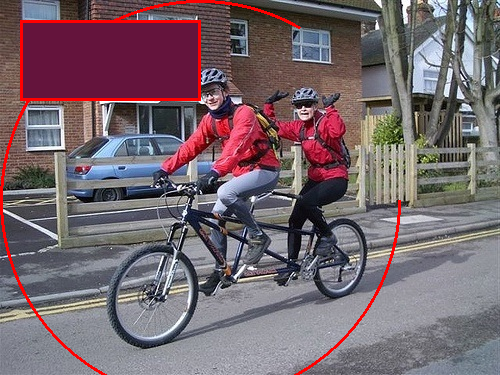

In [8]:
from PIL import Image, ImageDraw
pil_im = Image.open('home/images/bike2.jpg', 'r')
draw = ImageDraw.Draw(pil_im)
draw.arc((0, 0,400,400) , start=0, end=300, fill='red',width=3)
draw.rectangle((20, 20, 200, 100), fill=(100, 20, 60), outline="#FF0000", width=3)
pil_im.show() # display(pil_im)

- **关于 Pillow 更多的使用资料请[点击](https://www.itcodar.com/python/how-to-show-pil-image-in-ipython-notebook.html)查看。**


## 调用 Numpy 进行数组计算

> NumPy (Numerical Python) 是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也是针对数组运算提供大量的数学函数库。

**使用以下的例子来说明如何调用 Numpy：**

In [11]:
import numpy as np
# int8, int16, int32, int64 四种数据类型可以使用字符串 'i1', 'i2','i4','i8' 代替
dt = np.dtype('i4')
print(dt)

int32


- **关于 Numpy 的更多资料例程请[点击](https://www.runoob.com/numpy/numpy-tutorial.html)查看。**

## 调用 Opencv 读取 USB 摄像头拍照并显示到屏幕

**运行程序前先准备材料并接好线，把 USB 摄像头接入转接头的 USB 口，再把转接头的 Type-c 口接入设备板载的 OTG 口，使用 Type-c 数据线连接设备板载的 UART 口及电脑端进行上电操作。**

- 一个 USB 摄像头及 Type-c USB 转接头
- 一台 AXera-Pi 设备以及 Type-c 数据线

**在编辑框运行以下代码即可调用 Opencv 使用 USB 摄像头拍照。**


In [ ]:
import os
import cv2
video = cv2.VideoCapture(0)
for i in range(30):
    ret, frame = video.read()
    if ret:
        cv2.imwrite("/tmp/capture.jpg", frame)
        os.system("fbon && fbv /tmp/capture.jpg")

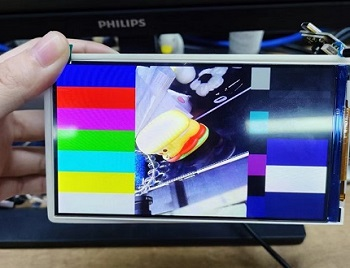

> 运行出现报错请移步[Maix-III 系列 AXera-Pi 常见问题(FAQ)](https://wiki.sipeed.com/hardware/zh/maixIII/ax-pi/faq_axpi.html)进行查询。

##  播放音视频

- [如何使用 Python 播放音视频](https://wiki.sipeed.com/soft/maixpy3/zh/usage/Audio/play_mp4.html)

## 发起 Http 请求或 MQTT 通信

- [如何发起 Http 请求或 MQTT 通信](https://wiki.sipeed.com/soft/maixpy3/zh/usage/net.html)


## 调用 PinPong 库控制 Microbit 

> PinPong 库是一套控制开源硬件主控板的 Pyhton 库，基于 Firmata 协议并兼容 MicroPython 语法。

**使用前请先准备材料并按步骤接线，使用 Micro usb 数据线连接 Microbit，然后把另一端接入转接头的 USB 口，再把转接头的 Type-c 口接入设备的 OTG 口，使用 Type-c 数据线连接设备的 UART 口及 PC 端通电。**

- 一个 Type-c USB 转接头
- 一台 Microbit 以及 Micro usb 数据线
- 一台 AXera-Pi 设备以及 Type-c 数据线

可直接在 `Python3` 环境运行下方代码即可连接 microbit 掌控版并会看到 `hello world` 亮灯效果。

In [ ]:
import time
from pinpong.board import Board,Pin
from pinpong.extension.microbit import *
Board("microbit","/dev/ttyACM0").begin()
display.show(Image.HEART)
while True:    
    display.scroll("hello world")


  __________________________________________
 |    ____  _       ____                    |
 |   / __ \(_)___  / __ \____  ____  ____ _ |
 |  / /_/ / / __ \/ /_/ / __ \/ __ \/ __ `/ |
 | / ____/ / / / / ____/ /_/ / / / / /_/ /  |
 |/_/   /_/_/ /_/_/    \____/_/ /_/\__, /   |
 |   v0.4.9  Designed by DFRobot  /____/    |
 |__________________________________________|
 
[01] Python3.9.2 Linux-4.19.125-armv7l-with-glibc2.31 Board: MICROBIT
selected -> board: MICROBIT serial: /dev/ttyACM0
[10] Opening /dev/ttyACM0
[32] Firmata ID: 2.7
[22] Arduino compatible device found and connected to /dev/ttyACM0
[40] Retrieving analog map...
[42] Auto-discovery complete. Found 26 Digital Pins and 6 Analog Pins
------------------------------
All right. PinPong go...
------------------------------



- **点击 [Microbit 传送门](https://pinpong.readthedocs.io/zh_CN/latest/2.pinpong%E7%A4%BA%E4%BE%8B/index1.html) 查看更多的相关例程资料。**

## 使用 PinPong 库控制 Arduino UNO 

**使用前请先准备材料按步骤接线，先用 Type-B 数据线连接 Arduino UNO，接着把另一端接入转接头的 USB 口，再把转接头的 Type-c 口接入设备板载的 OTG 口，使用 Type-c 数据线连接设备板载的 UART 口及电脑端进行上电操作。**

- 一个 Type-c USB 转接头
- 一台 Arduino UNO 以及 Type-b 数据线
- 一台 AXera-Pi 设备以及 Type-c 数据线

直接在编辑框运行以下代码控制 Arduino UNO 板点亮外接的 **LED** 灯以及板载也会亮起。

In [5]:
import time
from pinpong.board import Board,Pin
Board("uno","/dev/ttyUSB0").begin()               
led = Pin(Pin.D13, Pin.OUT) #引脚初始化为电平输出

while True:
  led.value(1) #输出高电平
  print("1") #终端打印信息
  time.sleep(1) #等待1秒 保持状态

  led.value(0) #输出低电平 
  print("0") #终端打印信息
  time.sleep(1) #等待1秒 保持状态


  __________________________________________
 |    ____  _       ____                    |
 |   / __ \(_)___  / __ \____  ____  ____ _ |
 |  / /_/ / / __ \/ /_/ / __ \/ __ \/ __ `/ |
 | / ____/ / / / / ____/ /_/ / / / / /_/ /  |
 |/_/   /_/_/ /_/_/    \____/_/ /_/\__, /   |
 |   v0.4.9  Designed by DFRobot  /____/    |
 |__________________________________________|
 
[01] Python3.9.2 Linux-4.19.125-armv7l-with-glibc2.31 Board: UNO
selected -> board: UNO serial: /dev/ttyUSB0
[10] Opening /dev/ttyUSB0
[32] Firmata ID: 2.7
[22] Arduino compatible device found and connected to /dev/ttyUSB0
[40] Retrieving analog map...
[42] Auto-discovery complete. Found 20 Digital Pins and 6 Analog Pins
------------------------------
All right. PinPong go...
------------------------------

1
0
1
0
1
user quit process


SystemExit: 0

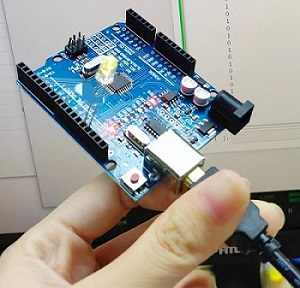

- **点击 [Arduino UNO 传送门](https://pinpong.readthedocs.io/zh_CN/latest/2.pinpong%E7%A4%BA%E4%BE%8B/index1.html) 查看更多的相关例程资料。**